In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


In [ ]:
for column in df.columns:
  print(df[column].value_counts())
  print("*"*20)


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df["balcony"].corr(df["price"])

0.12035530938067719

In [ ]:
df.head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


In [ ]:
df = df.drop(columns=['area_type','availability','society','balcony'])

In [ ]:
df.sample(1)

,location,size,total_sqft,bath,price
846,Sarjapur Road,3 BHK,1691,3.0,113.0


In [ ]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [ ]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df["size"].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [ ]:
df["size"]=df["size"].fillna("2 BHK")

In [ ]:
def sizehandler(x):
  x = str(x).split()
  if len(x) == 2:
    return int(x[0])
  else :
    return x

In [ ]:
df["BHK"] = df["size"].apply(sizehandler)

In [ ]:
df.sample(10)

,location,size,total_sqft,bath,price,BHK
2153,Kamakshipalya,4 BHK,800,4.0,80.0,4
5196,Kanakpura Road,2 BHK,1339,2.0,58.0,2
4110,Marathahalli,4 BHK,4000,4.0,220.0,4
10102,Ashok Nagar,2 BHK,703,2.0,60.0,2
3351,Gunjur Palya,3 BHK,1033,2.0,32.0,3
3358,Hosa Road,3 BHK,1665,2.0,125.0,3
4409,Kanakpura Road,2 BHK,1207,2.0,79.9,2
11217,Whitefield,3 BHK,1820,3.0,140.0,3
6168,1st Block Jayanagar,8 Bedroom,700,4.0,104.0,8
2999,7th Phase JP Nagar,3 BHK,1850,3.0,140.0,3


In [ ]:
df["BHK"].value_counts()

,count
BHK,
2,5544
3,4857
4,1417
1,656
5,356
6,221
7,100
8,89
9,54


In [ ]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def rangehandler(x):
  temp = x.split('-')
  if len(temp) == 2:
    return (float(temp[0]) + float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df["total_sqft"] = df["total_sqft"].apply(rangehandler)

In [ ]:
df["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
df.sample(5)

,location,size,total_sqft,bath,price,BHK
11495,Malleshwaram,2 BHK,302.0,2.0,25.0,2
8017,Whitefield,2 Bedroom,1200.0,2.0,45.0,2
4904,Old Airport Road,4 BHK,2658.0,5.0,187.0,4
10785,Horamavu Agara,2 BHK,1080.0,2.0,38.0,2
51,Bhoganhalli,3 BHK,1670.0,3.0,99.0,3


In [ ]:
df["location"].isnull().sum()

1

In [ ]:
df["location"].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [ ]:
df["location"] = df["location"].astype(str).apply(lambda x: x.strip())
location_count = df["location"].value_counts()

In [ ]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

,count
location,
BTM 1st Stage,10
Nagadevanahalli,10
Basapura,10
Sector 1 HSR Layout,10
Dairy Circle,10
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


In [ ]:
df["location"] = df["location"].apply(lambda x: "other" if x in location_count_less_10 else x)

In [ ]:
df["location"].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Nehru Nagar,11
Banjara Layout,11
LB Shastri Nagar,11


In [ ]:
df["location"] = df["location"].fillna("Whitefield")

In [ ]:
df["location"].isnull().sum()

0

In [ ]:
df.isnull().sum()

,0
location,0
size,0
total_sqft,46
bath,73
price,0
BHK,0


In [ ]:
df["bath"] = df["bath"].fillna(df["bath"].mean())

In [ ]:
df["total_sqft"] = df["total_sqft"].fillna(df["total_sqft"].mean())

<Axes: >

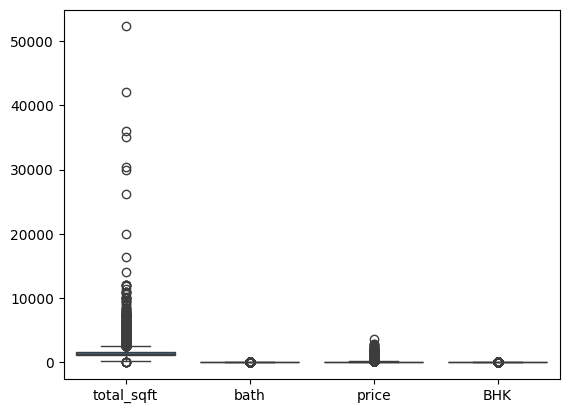

In [ ]:
sns.boxplot(df)

In [ ]:
df.sample(5)

,location,size,total_sqft,bath,price,BHK
5452,Gunjur,2 BHK,1080.0,2.0,41.0,2
7885,Bannerghatta Road,2 BHK,1215.0,2.0,68.0,2
527,Electronic City Phase II,2 BHK,1000.0,2.0,25.0,2
12766,Electronic City,3 BHK,1575.0,3.0,94.5,3
10762,Bhoganhalli,3 BHK,1707.0,3.0,115.0,3


In [ ]:
df["total_sqft"].corr(df["price"])

0.5749450685661572

In [ ]:
df = df[((df["total_sqft"]/df["BHK"]) >= 300)]

In [ ]:
df["price_per_sqft"] = df["total_sqft"]/df["price"]

<ipython-input-920-46e6fbe60717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_per_sqft"] = df["total_sqft"]/df["price"]


In [ ]:
df["price_per_sqft"].corr(df["price"])

-0.4052732226723384

In [ ]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,27.028411
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,21.666667
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,23.225806
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,16.010526
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,23.529412


<Axes: >

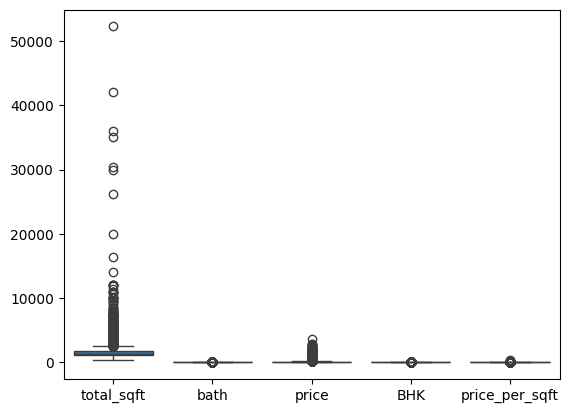

In [ ]:
sns.boxplot(df)

In [ ]:
df["BHK"].describe()

,BHK
count,12572.000000
mean,2.650811
std,0.977557
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,16.000000


In [ ]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)

    gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,1528.858654,2.499728,97.086536,2.591700,19.039794
std,912.928772,0.990152,96.767608,0.900876,5.923929
min,300.000000,1.000000,10.000000,1.000000,3.692308
25%,1115.000000,2.000000,51.000000,2.000000,15.144857
50%,1300.000000,2.000000,70.000000,2.000000,18.840580
75%,1679.750000,3.000000,106.000000,3.000000,22.597209
max,30400.000000,16.000000,2200.000000,16.000000,41.000000


<Axes: >

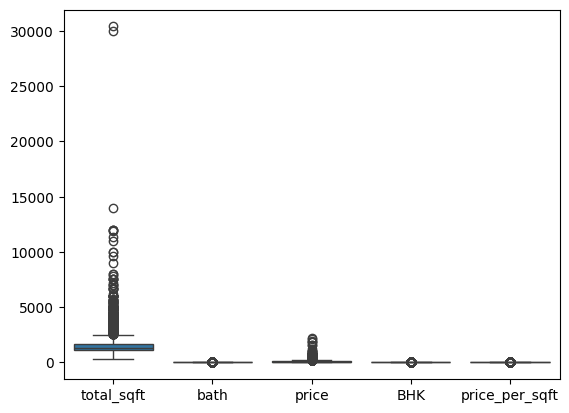

In [ ]:
sns.boxplot(df)

In [ ]:
def remove_outliers_BHK(df):
  df_output = pd.DataFrame()  # Initialize df_output before the loop
  for key,subdf in df.groupby("location"):
    m = np.mean(subdf.BHK)
    st = np.std(subdf.BHK)

    gen_df = subdf[(subdf.BHK > (m-st)) & (subdf.BHK <= (m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
df = remove_outliers_BHK(df)
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,7184.000000,7184.000000,7184.000000,7184.000000,7184.000000
mean,1414.785022,2.383160,86.320366,2.480651,19.270408
std,495.321044,0.631973,64.772639,0.535956,5.637460
min,395.000000,1.000000,10.000000,1.000000,3.692308
25%,1125.000000,2.000000,52.000000,2.000000,15.584737
50%,1275.000000,2.000000,68.000000,2.000000,19.046528
75%,1600.000000,3.000000,96.000000,3.000000,22.727273
max,9000.000000,8.000000,900.000000,5.000000,40.540541


In [ ]:
df.head(1)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,8.402062


In [ ]:
df = df.drop(columns=['size','price_per_sqft'])

In [ ]:
df.shape

(7184, 5)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.sample(1)

,location,total_sqft,bath,price,BHK
5434,other,1500.0,3.0,100.0,3


In [ ]:
x = df.drop(columns=['price'])
y = df['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False,handle_unknown="ignore"),['location']),
                                       remainder='passthrough')

In [ ]:
scaler = StandardScaler()

In [ ]:
li = LinearRegression()
l = Lasso()
r = Ridge()
d = DecisionTreeRegressor()
f = RandomForestRegressor()

In [ ]:
pipe = make_pipeline(column_trans,scaler,li)
pipe1 = make_pipeline(column_trans,scaler,l)
pipe2 = make_pipeline(column_trans,scaler,r)
pipe3 = make_pipeline(column_trans,scaler,d)
pipe4 = make_pipeline(column_trans,scaler,f)

In [ ]:
pipe.fit(x_train,y_train)
pipe1.fit(x_train,y_train)
pipe2.fit(x_train,y_train)
pipe3.fit(x_train,y_train)
pipe4.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
y_pred = pipe.predict(x_test)
y_pred1= pipe1.predict(x_test)
y_pred2= pipe2.predict(x_test)
y_pred3= pipe3.predict(x_test)
y_pred4= pipe4.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)



0.7998485044235402

In [ ]:
r2_score(y_test,y_pred1)

0.7840708654597371

In [ ]:
r2_score(y_test,y_pred2)

0.7998453289121588

In [ ]:
r2_score(y_test,y_pred3)

0.7097148874779922

In [ ]:
r2_score(y_test,y_pred4)

0.7955537028391199